In [10]:
# starting web3 operations
import numpy as np
import json
from web3 import Web3
import time
# ganache_url = "https://ropsten.infura.io/v3/0345978e22a6431f9222c56ea1f7b6bd"
#ganache_url="https://lively-dark-firefly.ropsten.quiknode.pro/e98606c11b422cb244ac923a53d36c5b7ea2c17c/"
ganache_url ="http://127.0.0.1:8545"
web3 = Web3(Web3.HTTPProvider(ganache_url))
web3.isConnected()

True

In [11]:
# Basic web3 
# block = web3.eth.get_block('latest')
# balance_1 = web3.eth.getBalance("0x37bfB436392DaAE0E91EdcD9c4128FBcADF3919d")
# print(web3.fromWei(balance_1,'ether'))

In [12]:
abi = json.loads('[ { "constant": false, "inputs": [ { "name": "x", "type": "int256" }, { "name": "y", "type": "int256" }, { "name": "a", "type": "uint256" }, { "name": "b", "type": "uint256" } ], "name": "sigmoid_act", "outputs": [], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": true, "inputs": [ { "name": "x", "type": "int256" }, { "name": "y", "type": "int256" } ], "name": "div", "outputs": [ { "name": "", "type": "int256" }, { "name": "", "type": "int256" } ], "payable": false, "stateMutability": "view", "type": "function" }, { "constant": true, "inputs": [], "name": "sigprint", "outputs": [ { "name": "", "type": "uint256" }, { "name": "", "type": "uint256" } ], "payable": false, "stateMutability": "view", "type": "function" } ]')

cont_address = "0x8a03D1D7B16160A66bAFDabd9C7c2368f9760aeb"

In [13]:
contract = web3.eth.contract(address=cont_address,abi=abi)

In [14]:
#grit
account1 = "0xdd617f9D5120b7b30E4C502fdd6b13dCf286A300"
private_key1="c00b36dc1777e7fda60ff1f55b57c3f51b18c0c16fe44724e451ed062a173d74"
account2 = "0x8883f1016E727C8fE93C1Df471f102bBbAF2B910"
private_key2="8d70f54549b5fb7c04fc016cc88c447fc81aff3af3065c696aee1b529fbc8ba5"


In [15]:
# account1 = "0x2C0c1D0dA7c537ad49b6AD3cdF0ed6db462446E9"
# private_key1="d2b80a53fd2b1a30ecbe14517a65c07858679034061f2d0d5f768518ed46a1b6"
# account2 = "0x76b717F8b07365060131752EE08242C268CFd37B"
# private_key2="a3e852bd651cf3aa5f6d863e0727519140431ae912588b351ab5f7ee02e06cac"

In [16]:
nonce = web3.eth.getTransactionCount(account1)

In [17]:
def sigfrac(x,y,a,b):
    nonce = web3.eth.getTransactionCount(account1)
    transaction = contract.functions.sigmoid_act(
        x,y,a,b
         ).buildTransaction({
        'gas': 100000,
        'gasPrice': web3.toWei('10', 'gwei'),
        'from': account1,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(transaction, private_key=private_key1)
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash,timeout=1000)
    return tx_receipt.gasUsed

In [18]:
n, d = contract.functions.sigprint().call()
print("value of sigmoid is:", n/d)

ZeroDivisionError: division by zero

In [19]:
# default sigmoid from system
import math
import numpy as np
def sigmoid(x,y):
    sig = 1 / (1 + math.exp(-x/y))
    return sig

In [31]:
a_list = list(range(-100, 101))
a_val_num = np.array(a_list)
a_val_den = np.full(201,10)

In [32]:
print(a_val_num/a_val_den)

[-10.   -9.9  -9.8  -9.7  -9.6  -9.5  -9.4  -9.3  -9.2  -9.1  -9.   -8.9
  -8.8  -8.7  -8.6  -8.5  -8.4  -8.3  -8.2  -8.1  -8.   -7.9  -7.8  -7.7
  -7.6  -7.5  -7.4  -7.3  -7.2  -7.1  -7.   -6.9  -6.8  -6.7  -6.6  -6.5
  -6.4  -6.3  -6.2  -6.1  -6.   -5.9  -5.8  -5.7  -5.6  -5.5  -5.4  -5.3
  -5.2  -5.1  -5.   -4.9  -4.8  -4.7  -4.6  -4.5  -4.4  -4.3  -4.2  -4.1
  -4.   -3.9  -3.8  -3.7  -3.6  -3.5  -3.4  -3.3  -3.2  -3.1  -3.   -2.9
  -2.8  -2.7  -2.6  -2.5  -2.4  -2.3  -2.2  -2.1  -2.   -1.9  -1.8  -1.7
  -1.6  -1.5  -1.4  -1.3  -1.2  -1.1  -1.   -0.9  -0.8  -0.7  -0.6  -0.5
  -0.4  -0.3  -0.2  -0.1   0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7
   0.8   0.9   1.    1.1   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9
   2.    2.1   2.2   2.3   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1
   3.2   3.3   3.4   3.5   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3
   4.4   4.5   4.6   4.7   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5
   5.6   5.7   5.8   5.9   6.    6.1   6.2   6.3   

In [33]:
sig_b=np.zeros(201)
for i in range(len(a_val_num)):
    sig_b[i] = sigmoid(int(a_val_num[i]),int(a_val_den[i]))
    

In [34]:
sig_e=np.zeros(201)
gasUse =[]
for i in range(len(a_val_num)):
#     time.sleep(10)
    if (a_val_num[i]<0):
        gasUse.append(sigfrac(int(a_val_num[i]),int(a_val_den[i]),int(a_val_num[i]*(-1)),int(a_val_den[i])))
    else:
        gasUse.append(sigfrac(int(a_val_num[i]),int(a_val_den[i]),int(a_val_num[i]),int(a_val_den[i]))) 
    n, d = contract.functions.sigprint().call()
    
    sig_e[i] = n/d

In [35]:
# sig_b

In [36]:
# sig_e

In [41]:
d = np.arange(-10.0, 10.1, 0.1)
# d

In [38]:
print(sig_e)

[4.60706545e-05 5.09603052e-05 5.62669385e-05 6.21452747e-05
 6.86538351e-05 7.58568004e-05 8.38247663e-05 9.26356662e-05
 1.02375862e-04 1.13141361e-04 1.25039044e-04 1.38308746e-04
 1.52709817e-04 1.68662063e-04 1.86324195e-04 2.05870258e-04
 2.27491675e-04 2.51399742e-04 2.77828581e-04 3.07038427e-04
 3.39318957e-04 3.75320464e-04 4.14389594e-04 4.57664701e-04
 5.05575613e-04 5.58593562e-04 6.17236690e-04 6.82076774e-04
 7.53747155e-04 8.32951590e-04 9.20473167e-04 1.01807194e-03
 1.12397330e-03 1.24125891e-03 1.37108834e-03 1.51473203e-03
 1.67358588e-03 1.84918903e-03 2.04324498e-03 2.25764487e-03
 2.49449098e-03 2.75852376e-03 3.04491770e-03 3.36197746e-03
 3.71279879e-03 4.10076713e-03 4.52959481e-03 5.00336651e-03
 5.52659264e-03 6.10426819e-03 6.74193090e-03 7.45218103e-03
 8.22185966e-03 9.07307572e-03 1.00138605e-02 1.10529526e-02
 1.21998822e-02 1.34650736e-02 1.48599658e-02 1.63971407e-02
 1.80904447e-02 1.99722003e-02 2.20063058e-02 2.42497431e-02
 2.67217564e-02 2.944298

In [39]:
print(sig_b)

[4.53978687e-05 5.01721647e-05 5.54485247e-05 6.12797396e-05
 6.77241496e-05 7.48462275e-05 8.27172229e-05 9.14158739e-05
 1.01029194e-04 1.11653341e-04 1.23394576e-04 1.36370327e-04
 1.50710358e-04 1.66558065e-04 1.84071905e-04 2.03426978e-04
 2.24816770e-04 2.48455082e-04 2.74578156e-04 3.03447030e-04
 3.35350130e-04 3.70606141e-04 4.09567165e-04 4.52622223e-04
 5.00201107e-04 5.52778637e-04 6.10879359e-04 6.75082731e-04
 7.46028834e-04 8.24424686e-04 9.11051194e-04 1.00677082e-03
 1.11253603e-03 1.22939862e-03 1.35851995e-03 1.50118226e-03
 1.65880108e-03 1.83293894e-03 2.02532039e-03 2.23784852e-03
 2.47262316e-03 2.73196076e-03 3.01841632e-03 3.33480731e-03
 3.68423990e-03 4.07013772e-03 4.49627316e-03 4.96680165e-03
 5.48629890e-03 6.05980149e-03 6.69285092e-03 7.39154134e-03
 8.16257115e-03 9.01329865e-03 9.95180187e-03 1.09869426e-02
 1.21284350e-02 1.33869178e-02 1.47740317e-02 1.63024994e-02
 1.79862100e-02 1.98403057e-02 2.18812709e-02 2.41270214e-02
 2.65969936e-02 2.931223

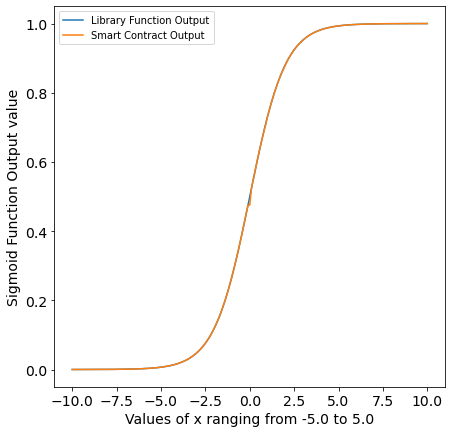

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.plot(d, sig_b, label = "Library Function Output")
plt.plot(d, sig_e, label = "Smart Contract Output")
plt.xlabel("Values of x ranging from -5.0 to 5.0", fontsize=14)
plt.ylabel("Sigmoid Function Output value", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
# plt.title("Sigmoid Value With Smart Contract Function")
plt.legend()
plt.savefig("sigmoid_output.pdf", bbox_inches='tight')
plt.show()

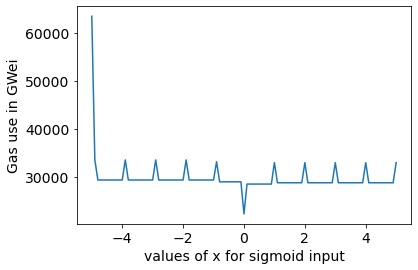

In [30]:
plt.plot(d, gasUse, label="gas Used Per Function Call")
# plt.title("Gas Consumption per sigmoid function Calls")
plt.ylabel("Gas use in GWei",fontsize=14)
plt.xlabel("values of x for sigmoid input",fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.savefig("sigmoid_gas.pdf", bbox_inches='tight')
plt.show()

